# 가설설정

지역의 저소득층 비율이 낮을수록 집 값이 높을 것이다.

학생/교사 비율이 높을수록 집 값이 높을 것이다. 

보스턴 시 고용시설까지 거리가 가까울수록 집값이 높을 것이다.

산화질소 농도가 높을수록 집값이 낮을 것이다.

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from statsmodels.formula.api import ols
import statsmodels.api as sm

from statsmodels.api import qqplot, add_constant

import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE

from statsmodels.tools.eval_measures import rmse

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

import seaborn as sns


%matplotlib inline

In [10]:
df_raw = pd.read_csv("BOSTON_HOUSING.csv", engine='python')

In [11]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MEDV     506 non-null    float64
 1   CRIM     506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    int64  
 5   NOX      506 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        506 non-null    float64
 13  LSTAT    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [12]:
df_raw.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7dd0038a90>,
      dtype=object)

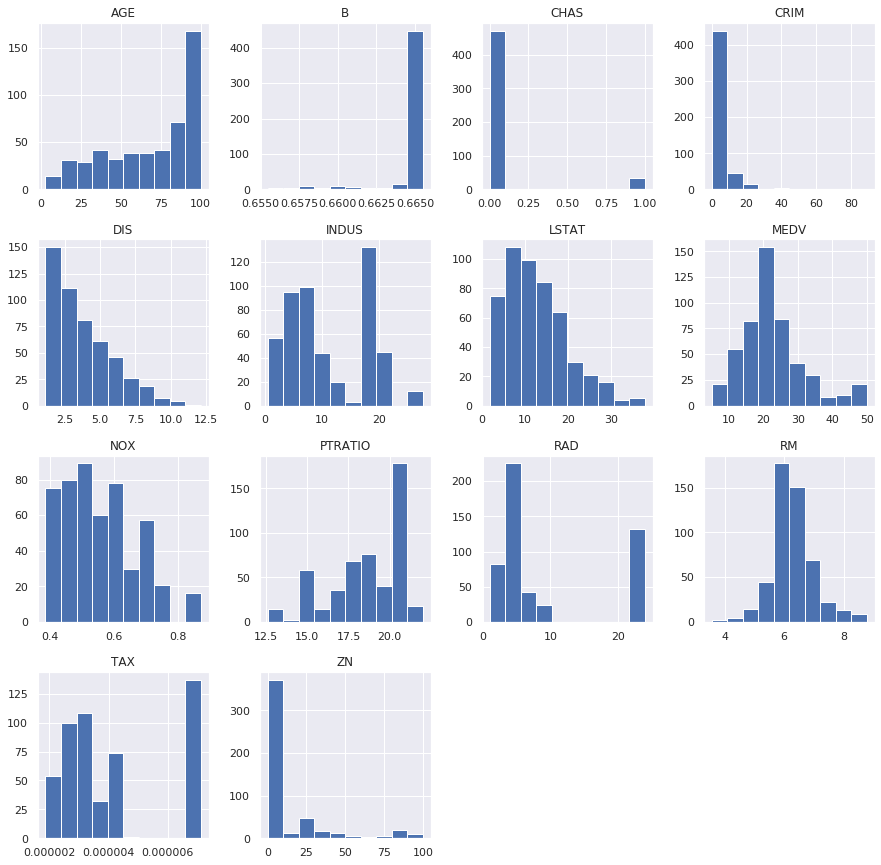

In [24]:
df_raw.hist(figsize=(15,15))


In [25]:
#흑인 비율로 값 변경
df_raw['B'] = np.where(df_raw['B'] , (0.63 + np.sqrt(df_raw['B']/1000)), df_raw['B'])
df_raw['TAX'] = np.where(df_raw['TAX'], df_raw["TAX"]/10000, df_raw['TAX'])


In [26]:
df_raw.head(15)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,2.960000e-10,15.300000,0.655797,4.980000
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,2.420000e-10,17.799999,0.655797,9.140000
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,2.420000e-10,17.799999,0.655796,4.030000
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,2.220000e-10,18.700001,0.655797,2.940000
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,2.220000e-10,18.700001,0.655797,5.330000
5,28.700001,0.02985,0.0,2.18,0,0.458,6.430,58.700001,6.0622,3,2.220000e-10,18.700001,0.655797,5.210000
6,22.900000,0.08829,12.5,7.87,0,0.524,6.012,66.599998,5.5605,5,3.110000e-10,15.200000,0.655797,12.430000
7,27.100000,0.14455,12.5,7.87,0,0.524,6.172,96.099998,5.9505,5,3.110000e-10,15.200000,0.655797,19.150000
8,16.500000,0.21124,12.5,7.87,0,0.524,5.631,100.000000,6.0821,5,3.110000e-10,15.200000,0.655795,29.930000
9,18.900000,0.17004,12.5,7.87,0,0.524,6.004,85.900002,6.5921,5,3.110000e-10,15.200000,0.655795,17.100000


In [18]:
df_raw_y = df_raw["MEDV"]
df_raw_x = df_raw.drop("MEDV", axis=1)

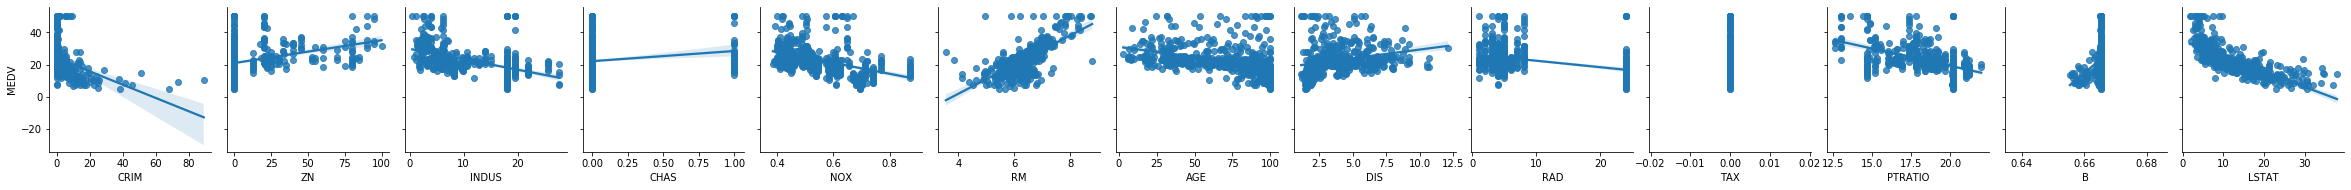

In [19]:
sns.pairplot(df_raw, y_vars="MEDV",x_vars=["CRIM", "ZN", "INDUS", "CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"], kind="reg")
# sns.pairplot(df_raw, y_vars="MEDV",x_vars=["logCRIM", "ZN", "INDUS", "CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT", "reB"])

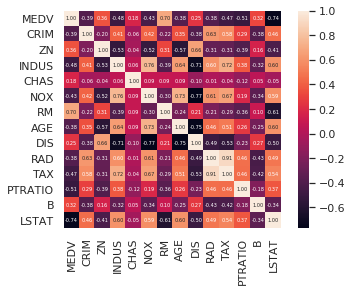

In [22]:
cols = ["MEDV","CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
cm = np.corrcoef(df_raw[cols].values.T)
sns.set(font_scale=1)

hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt = ".2f",
                annot_kws={'size':5}, yticklabels=cols, xticklabels=cols)
plt.show()

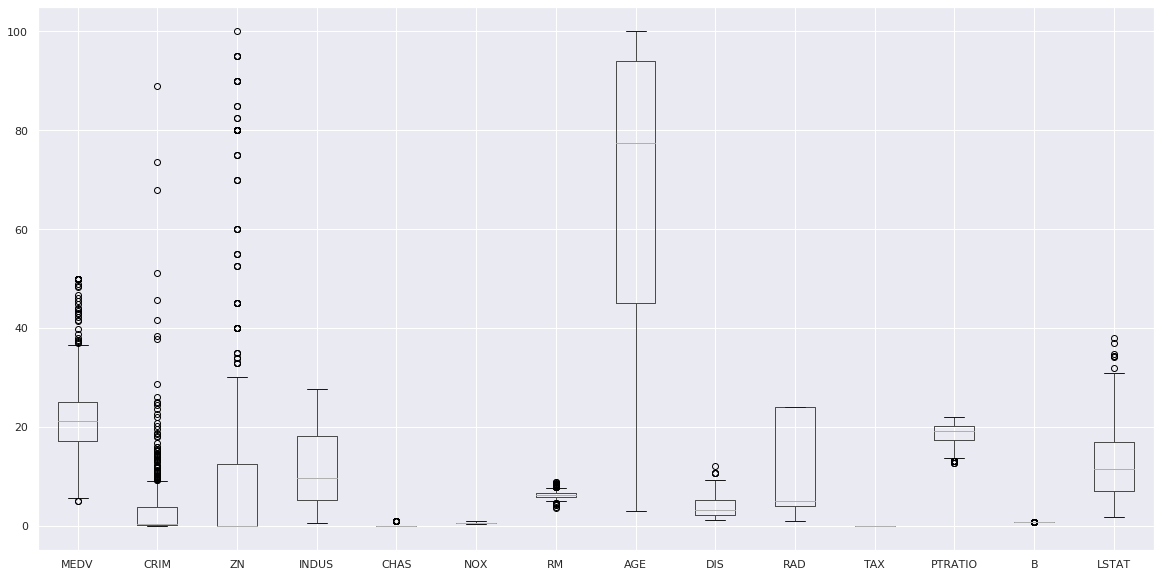

In [28]:
df_raw.boxplot(figsize = (20,10))

In [29]:
df_raw.corr().round(3) #상관계수 분석

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000,-0.388,0.360,-0.484,0.175,-0.427,0.695,-0.377,0.250,-0.382,-0.469,-0.508,0.319,-0.738
CRIM,-0.388,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.384,0.456
ZN,0.360,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.159,-0.413
INDUS,-0.484,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.323,0.604
CHAS,0.175,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.053,-0.054
NOX,-0.427,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.341,0.591
RM,0.695,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.104,-0.614
AGE,-0.377,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.245,0.602
DIS,0.250,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.266,-0.497
RAD,-0.382,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.432,0.489


# 회귀모델 생성

In [30]:
reg_model = smf.ols(formula="MEDV ~ CRIM + INDUS + CHAS + NOX + RM + AGE +\
                    DIS + RAD + TAX + PTRATIO + LSTAT  + ZN + B", data = df_raw)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     108.7
Date:                Tue, 14 Jul 2020   Prob (F-statistic):          2.49e-135
Time:                        22:31:20   Log-Likelihood:                -1497.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     492   BIC:                             3083.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.702e+04   4547.345     -3.743      0.0

F가 108 > 4 임으로 Pvalue가 0.05보다 작으며 유의하다.

# VIF 를 통한 다중공선성 확인

In [31]:
df_raw_x = df_raw.drop(["MEDV"], axis=1)

df_raw_x_const = add_constant(df_raw_x)

df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values("VIF", inplace= True)
df_vif.round(3)

,variable,VIF
4,CHAS,1.074000e+00
12,B,1.313000e+00
11,PTRATIO,1.798000e+00
1,CRIM,1.799000e+00
6,RM,1.938000e+00
2,ZN,2.299000e+00
13,LSTAT,2.933000e+00
7,AGE,3.101000e+00
8,DIS,3.955000e+00
3,INDUS,3.990000e+00


In [32]:
df_raw_y = df_raw["MEDV"]

model = LinearRegression()

rfe = RFE(estimator = model, n_features_to_select =8).fit(df_raw_x, df_raw_y)

selected_cols = df_raw_x.columns[rfe.support_]
removed_cols = df_raw_x.columns[~rfe.support_]

print("Selected Variables:{}".format(selected_cols))
print("Removed Variables:{}".format(removed_cols))

Selected Variables:Index(['CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='object')
Removed Variables:Index(['CRIM', 'ZN', 'INDUS', 'AGE', 'RAD'], dtype='object')


# p-value가 대체로 0으로 수렴하고 VIF값도 10이 넘어가는 것이 없기 때문에 5개의 변수만 제거해서 모델 재구축

In [33]:
reg_model = smf.ols(formula="MEDV ~ CHAS + NOX + RM + DIS + TAX + PTRATIO + LSTAT + B", data = df_raw)
reg_result = reg_model.fit()

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     162.4
Date:                Tue, 14 Jul 2020   Prob (F-statistic):          2.28e-133
Time:                        22:31:23   Log-Likelihood:                -1515.2
No. Observations:                 506   AIC:                             3048.
Df Residuals:                     497   BIC:                             3086.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.669e+04   4596.536     -3.631      0.0

# adj r2값이 0.719로 모델 설명력이 소폭 하락하였다

# 다중공선성 재확인

In [34]:
df_raw_x = df_raw.drop(["MEDV",'CRIM', 'ZN', 'INDUS', 'AGE', 'RAD'], axis=1)

df_raw_x_const = add_constant(df_raw_x)

df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values("VIF", inplace= True)
df_vif.round(3)

,variable,VIF
1,CHAS,1.052000e+00
7,B,1.265000e+00
6,PTRATIO,1.493000e+00
3,RM,1.744000e+00
5,TAX,2.469000e+00
8,LSTAT,2.504000e+00
4,DIS,2.563000e+00
2,NOX,3.694000e+00
0,const,4.494493e+08


# TAX 변수의 p-value값이 0.704이기 때문에 변수에서 제외

In [35]:
df_raw_x = df_raw_x.drop(["TAX"], axis=1)

reg_model = smf.ols(formula="MEDV ~ CHAS + NOX + RM + DIS + PTRATIO + LSTAT + B", data = df_raw)
reg_result = reg_model.fit()

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     185.8
Date:                Tue, 14 Jul 2020   Prob (F-statistic):          1.74e-134
Time:                        22:31:25   Log-Likelihood:                -1515.3
No. Observations:                 506   AIC:                             3047.
Df Residuals:                     498   BIC:                             3080.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.631e+04   4482.619     -3.638      0.0

# 최종 모델의 adj-r2값 : 0.719

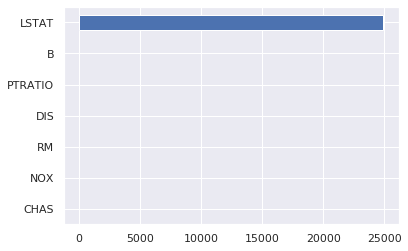

In [36]:
df_reg_coef = pd.DataFrame({"Coef":reg_result.params.values[1:]},index = df_raw_x.columns)
df_reg_coef.plot.barh(y= "Coef", legend=False)

# 스케일링을 통한 변수 중요도 재확인

In [37]:
scaler = StandardScaler()

cols = df_raw_x.columns

np_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame (np_scaled, columns=cols)


df_scaled["MEDV"] = df_raw["MEDV"]

reg_model_scaled = smf.ols(formula = "MEDV ~ CHAS + NOX + RM + DIS + PTRATIO + B + LSTAT", data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()

print(reg_result_scaled.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     185.8
Date:                Tue, 14 Jul 2020   Prob (F-statistic):          1.74e-134
Time:                        22:31:26   Log-Likelihood:                -1515.3
No. Observations:                 506   AIC:                             3047.
Df Residuals:                     498   BIC:                             3080.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.217    104.015      0.0

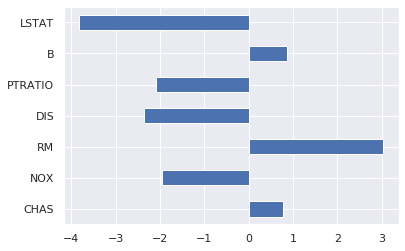

In [38]:
df_reg_coef = pd.DataFrame({"Coef": reg_result_scaled.params.values[1:]}, index = cols)
df_reg_coef.plot.barh(y = "Coef", legend = False)

In [39]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print(" test data X size : {}".format(df_test_x.shape))
print(" test data Y size : {}".format(df_test_y.shape))

train data X size : (354, 7)
train data Y size : (354,)
 test data X size : (152, 7)
 test data Y size : (152,)


In [40]:
model.fit(df_train_x, df_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print("Score on set: {:.3f}".format(model.score(df_test_x, df_test_y)))

Score on set: 0.752


# DecisionTree Regression

In [42]:
dt_uncustomized = DecisionTreeRegressor(random_state=1234)
dt_uncustomized.fit(df_train_x, df_train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [43]:
print("Score on set: {:.3f}".format(dt_uncustomized.score(df_test_x, df_test_y)))

Score on set: 0.829


# RandomForest Regression

In [46]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1234, verbose=0, warm_start=False)

In [47]:
print("Score on set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on set: 0.889


# GradientBoosting Regression

In [48]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
print("Score on set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on set: 0.888


# 모델에 따른 정확도 비교

In [55]:
model_y_pred = reg_result.predict(df_test_x)
dt_y_pred = dt_uncustomized.predict(df_test_x)
rf_y_pred = rf_uncustomized.predict(df_test_x)
gb_y_pred = gb_uncustomized.predict(df_test_x)

In [56]:
df_test_x

,CHAS,NOX,RM,DIS,PTRATIO,B,LSTAT
64,0,0.4161,7.104,9.2229,18.600000,0.655796,8.050000
100,0,0.5200,6.727,2.7778,20.900000,0.655797,9.420000
400,0,0.6930,5.987,1.5888,20.200001,0.655797,26.770000
485,0,0.5830,6.312,3.9917,20.200001,0.655795,10.580000
454,0,0.7130,6.728,2.4961,20.200001,0.655626,18.709999
...,...,...,...,...,...,...,...
314,0,0.5440,6.567,3.6023,18.400000,0.655797,9.280000
287,0,0.4050,6.209,7.3172,16.600000,0.655797,7.140000
384,0,0.7000,4.368,1.4395,20.200001,0.655771,30.629999
108,0,0.5200,6.474,2.4329,20.900000,0.655797,12.270000


In [57]:
models = ['MultiLinearRegression', 'DecisionTree', 'RandomForest','GradientBoosting']
accuracy = [model.score(df_test_x, df_test_y), dt_uncustomized.score(df_test_x, df_test_y), rf_uncustomized.score(df_test_x, df_test_y),gb_uncustomized.score(df_test_x, df_test_y)]
mse = [mean_squared_error(df_test_y, model_y_pred),mean_squared_error(df_test_y, dt_y_pred),mean_squared_error(df_test_y, rf_y_pred),mean_squared_error(df_test_y, gb_y_pred)]

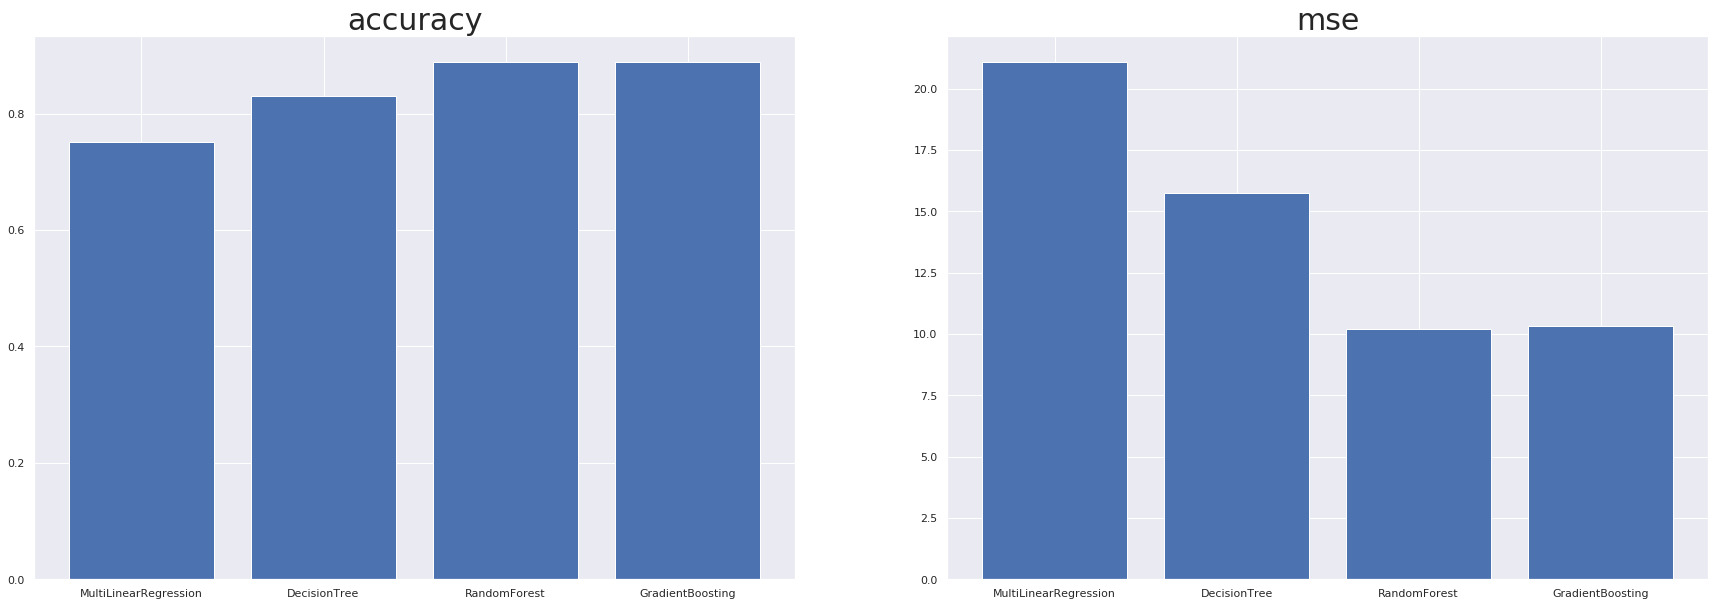

In [58]:
fig, ax = plt.subplots(1,2, figsize=(30,10))

ax[0].bar(models,accuracy)
ax[0].set_title("accuracy").set_fontsize(30)


ax[1].bar(models,mse)
ax[1].set_title("mse").set_fontsize(30)

In [59]:
result = float(gb_uncustomized.predict(np.array([0, 0.5250, 6.8564, 6.7923, 19.5687, 1.3620, 20.5423]).reshape(1,-1)))
print("Prediction for the parameters is %.3f" %result)

Prediction for the parameters is 18.610
